In [2]:
%matplotlib inline

import numpy as np
import scipy
import scipy.io
import scipy.sparse as sp
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

### Load the data

In [3]:
from data_helpers import load_data, preprocess_data

path_dataset = "../data/data_train.csv"
ratings = load_data(path_dataset)

number of items: 10000, number of users: 1000


### Plot the number of ratings per movie and user

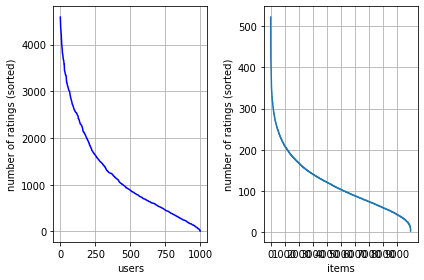

min # of items per user = 8, min # of users per item = 3.


In [4]:
from plots import plot_raw_data

num_items_per_user, num_users_per_item = plot_raw_data(ratings)

print("min # of items per user = {}, min # of users per item = {}.".format(min(num_items_per_user), min(num_users_per_item)))

### Split the data into a train and test set

In [5]:
def split_data(ratings, num_items_per_user, num_users_per_item, min_num_ratings, p_test=0.1):
    """split the ratings to training data and test data.
    Args:
        min_num_ratings: 
            all users and items we keep must have at least min_num_ratings per user and per item. 
    """
    # set seed
    np.random.seed(988)
    
    # select user and item based on the condition.
    valid_users = np.where(num_items_per_user >= min_num_ratings)[0] #numpy.where(condition[, x, y]) --> returns elements chosen from x or y depending on condition
    valid_items = np.where(num_users_per_item >= min_num_ratings)[0]
    valid_ratings = ratings[valid_items, :][: , valid_users]  
    
    # init
    num_rows, num_cols = valid_ratings.shape
    train = sp.lil_matrix((num_rows, num_cols))
    test = sp.lil_matrix((num_rows, num_cols))
    
    print("the shape of original ratings. (# of row, # of col): {}".format(ratings.shape))
    print("the shape of valid ratings. (# of row, # of col): {}".format((num_rows, num_cols)))

    nz_items, nz_users = valid_ratings.nonzero() #return the indices of the elements that are non-zero
    
    # split the data
    for user in set(nz_users): #pour chaque colonne(user), on choisit p_test(10%) de lignes(movies) pour le test set,  les lignes restantes étant pour le train set
        # randomly select a subset of ratings
        row, col = valid_ratings[:, user].nonzero()
        selects = np.random.choice(row, size=int(len(row) * p_test)) #generates a random sample from a given 1-D array
        residual = list(set(row) - set(selects))

        # add to train set
        for res in residual:
            train[res, user] = valid_ratings[res, user]

        # add to test set
        for sel in selects:
            test[sel, user] = valid_ratings[sel, user]
    
    print("Total number of nonzero elements in original data:{v}".format(v=ratings.nnz)) #number of stored values, including explicit zeros
    print("Total number of nonzero elements in train data:{v}".format(v=train.nnz))
    print("Total number of nonzero elements in test data:{v}".format(v=test.nnz))
    return valid_ratings, train, test

In [6]:
valid_ratings, train, test = split_data(ratings, num_items_per_user, num_users_per_item, min_num_ratings=10, p_test=0.1)

the shape of original ratings. (# of row, # of col): (10000, 1000)
the shape of valid ratings. (# of row, # of col): (9990, 999)
Total number of nonzero elements in original data:1176952
Total number of nonzero elements in train data:1065253
Total number of nonzero elements in test data:111620


### Implement baselines

#### Use the global mean to do the prediction

In [12]:
from proj2_helpers import baseline_global_mean

rmse = baseline_global_mean(train, test)
print("test RMSE of baseline using the global mean: {v}.".format(v=rmse))

test RMSE of baseline using the global mean: [[1.12152228]].


#### Use the user means to do the prediction

In [13]:
from proj2_helpers import baseline_user_mean

rmse = baseline_user_mean(train, test)
print("test RMSE of the baseline using the user mean: {v}.".format(v=rmse))

test RMSE of the baseline using the user mean: [[1.03317038]].


#### Use the item means to do the prediction

In [14]:
from proj2_helpers import baseline_item_mean

rmse = baseline_item_mean(train, test)
print("test RMSE of the baseline using the item mean: {v}.".format(v=rmse))

test RMSE of the baseline using the item mean: [[1.09633198]].


### Predict the ratings of the entries specified in sample_submission file

In [16]:
from proj2_helpers import read_csv_sample

INPUT_PATH = "../data/sample_submission.csv"
items, users = read_csv_sample(INPUT_PATH)

#TODO: predict the ratings for the couples of (items, users) and store them in predictions

### Save output for submission

In [4]:
from proj2_helpers import create_csv_submission

OUTPUT_PATH = "../data/submission.csv"
create_csv_submission(ids, predictions, OUTPUT_PATH)
print("File submission.csv ready to be submitted !")

SyntaxError: invalid syntax (<ipython-input-4-b53775eec35b>, line 3)